In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from tensorflow import keras as kr
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

import shap

import matplotlib.pyplot as plt

In [2]:
# upload
print('Uploading...')
exp_matrix = pd.read_csv('/root/work/data/stad_exp_matrix', index_col=0)
label = pd.read_csv('/root/work/data/stad_label')
print('Uploading done!')

Uploading...
Uploading done!


In [3]:
# data preprocessing
x = exp_matrix.T

# str -> int
y = np.array(label['Molecular.Subtype'].map({'CIN':0, 'GS':1, 'MSI':2, 'EBV':3}).astype(int))

# int -> onthot
def getOnehotLable(old_label):
    num_labels = old_label.shape[0]
    num_classes=4
    index_offset = np.arange(num_labels) * num_classes
    labels_one_hot = np.zeros((num_labels, num_classes))
    labels_one_hot.flat[index_offset + old_label.ravel()] = 1
    return labels_one_hot
    
y = getOnehotLable(y)

In [4]:
seed = 2022
np.random.seed(seed)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=seed)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(152, 9742) (66, 9742) (152, 4) (66, 4)


In [9]:
model = Sequential()
model.add(Dense(1024, input_dim=train_x.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128,kernel_initializer='uniform',activation='relu'))
model.add(Dense(128,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(4,kernel_initializer='uniform',activation='softmax'))

model.compile(loss=kr.losses.CategoricalCrossentropy(), optimizer='adam', metrics=['categorical_accuracy'])
#sgd = kr.optimizers.SGD(learning_rate=0.001)

Epoch 1/50
2/2 [==============================] - 1s 157ms/step - loss: 1.3233 - categorical_accuracy: 0.2829 - val_loss: 0.9501 - val_categorical_accuracy: 0.6515
Epoch 2/50
2/2 [==============================] - 0s 41ms/step - loss: 0.7538 - categorical_accuracy: 0.7829 - val_loss: 0.8219 - val_categorical_accuracy: 0.6667
Epoch 3/50
2/2 [==============================] - 0s 39ms/step - loss: 0.5370 - categorical_accuracy: 0.8026 - val_loss: 0.6015 - val_categorical_accuracy: 0.7879
Epoch 4/50
2/2 [==============================] - 0s 40ms/step - loss: 0.3706 - categorical_accuracy: 0.8882 - val_loss: 0.6624 - val_categorical_accuracy: 0.7576
Epoch 5/50
2/2 [==============================] - 0s 42ms/step - loss: 0.2303 - categorical_accuracy: 0.9342 - val_loss: 0.4706 - val_categorical_accuracy: 0.8485
Epoch 6/50
2/2 [==============================] - 0s 44ms/step - loss: 0.2503 - categorical_accuracy: 0.9211 - val_loss: 0.9448 - val_categorical_accuracy: 0.7273
Epoch 7/50
2/2 [=====

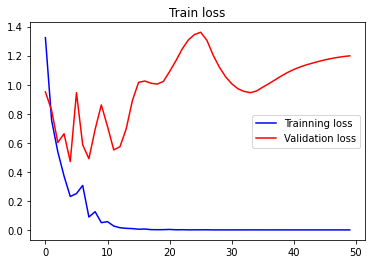

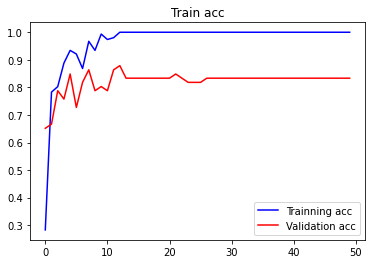

3/3 [==============================] - 0s 4ms/step - loss: 1.1986 - categorical_accuracy: 0.8333


In [10]:
b = 128
train_history=model.fit(train_x,
                        train_y,
                        epochs=50,
                        validation_data=(test_x,test_y),
                        batch_size=b)

loss=train_history.history['loss']
acc=train_history.history['categorical_accuracy']
epochs=range(0,len(loss))
plt.title("Train loss")
plt.plot(epochs,loss,'b',label='Trainning loss')
val_loss=train_history.history['val_loss']
val_acc=train_history.history['val_categorical_accuracy']
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.legend(loc='best')
plt.figure()
plt.title("Train acc")
plt.plot(epochs,acc,'b',label='Trainning acc')
plt.plot(epochs,val_acc,'r',label='Validation acc')
plt.legend(loc='best')
plt.show()

scores=model.evaluate(test_x,test_y)

In [ ]:
loss, accuracy = model.evaluate(test_x, test_y)
print('test loss: ', loss)
print('test accuracy: ', accuracy)

3/3 [==============================] - 0s 5ms/step - loss: 1.0923 - categorical_accuracy: 0.8333
test loss:  1.0922958850860596
test accuracy:  0.8333333134651184


In [ ]:
background1 = np.array(train_x)[np.random.choice(np.array(train_x).shape[0], 100, replace=False)]
background = np.array(train_x)

In [ ]:
e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)

keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


In [ ]:
# shap_values = e.shap_values(np.array(test_x))
shap_values = e.shap_values(np.array(test_x))

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


AttributeError: in user code:

    /usr/local/lib/python3.6/dist-packages/shap/explainers/_deep/deep_tf.py:243 grad_graph  *
        out = self.model(shap_rAnD)
    /usr/local/lib/python3.6/dist-packages/keras/engine/base_layer.py:1037 __call__  **
        outputs = call_fn(inputs, *args, **kwargs)
    /usr/local/lib/python3.6/dist-packages/keras/engine/functional.py:415 call
        inputs, training=training, mask=mask)
    /usr/local/lib/python3.6/dist-packages/keras/engine/functional.py:550 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /usr/local/lib/python3.6/dist-packages/keras/engine/base_layer.py:1037 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /usr/local/lib/python3.6/dist-packages/keras/layers/core.py:1229 call
        outputs = tf.raw_ops.MatMul(a=inputs, b=self.kernel)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/util/tf_export.py:404 wrapper
        return f(**kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gen_math_ops.py:5714 mat_mul
        name=name)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/op_def_library.py:522 _apply_op_helper
        preferred_dtype=default_dtype)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/profiler/trace.py:163 wrapped
        return func(*args, **kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/ops.py:1566 convert_to_tensor
        ret = conversion_func(value, dtype=dtype, name=name, as_ref=as_ref)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/resource_variable_ops.py:2023 _dense_var_to_tensor
        return var._dense_var_to_tensor(dtype=dtype, name=name, as_ref=as_ref)  # pylint: disable=protected-access
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/resource_variable_ops.py:1421 _dense_var_to_tensor
        return self.value()
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/resource_variable_ops.py:576 value
        return self._read_variable_op()
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/resource_variable_ops.py:683 _read_variable_op
        result = read_and_set_handle()
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/resource_variable_ops.py:674 read_and_set_handle
        self.handle, self._dtype)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gen_resource_variable_ops.py:491 read_variable_op
        "ReadVariableOp", _inputs_flat, _attrs, _result)
    /usr/local/lib/python3.6/dist-packages/shap/explainers/_deep/deep_tf.py:26 custom_record_gradient
        out = tf_backprop._record_gradient("shap_"+op_name, inputs, attrs, results)

    AttributeError: module 'tensorflow.python.eager.backprop' has no attribute '_record_gradient'
